## Infinite Overlapping Mixture Model with Binary clusters

In [163]:
%load_ext autoreload
%autoreload 2
import utils, iomm_infinite

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Synthetic Data

In [164]:
#Generate synthetic data
K=6
N=20
n_train=7
D=8
N_iter=500
alpha_prior = 4
burning_period=200

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

In [165]:
Z

array([[ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.]])

In [166]:
X

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.]])

In [157]:
theta

array([[  9.63425263e-01,   9.46952420e-01,   8.60918126e-01,
          7.74101744e-01,   3.96521441e-02,   2.25481360e-01,
          7.80974155e-01,   1.59231213e-01],
       [  3.65930471e-01,   6.87192960e-01,   3.33651590e-01,
          2.17835285e-01,   9.04164726e-01,   3.78787935e-01,
          3.72940473e-01,   2.69630875e-03],
       [  9.32463561e-01,   2.81892798e-01,   9.90014837e-01,
          7.36709017e-01,   1.00560094e-03,   9.80380552e-01,
          5.10555417e-04,   6.54514056e-01],
       [  8.49066165e-01,   4.37672521e-01,   1.53599162e-01,
          7.38534990e-01,   2.87499655e-01,   4.95658562e-01,
          8.39777844e-01,   2.64605141e-01],
       [  7.78108033e-01,   7.53590482e-02,   5.94231470e-02,
          2.47528998e-02,   6.23337269e-01,   5.06189436e-02,
          2.66288163e-02,   2.04028041e-01],
       [  4.48123505e-01,   4.08997398e-01,   2.83461652e-04,
          6.02934209e-01,   4.61430841e-01,   9.67409353e-01,
          3.78242170e-01,   5.7

#### IOMM algorithm

In [158]:
IOMM = iomm.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 1,
                 copy_rows = n_train,
                 burning_period=burning_period)

In [159]:
%%capture
Z_hat,theta_resampled,U_hat = IOMM.learning(apply_log=False,random_walk=False)

In [120]:
Z_hat

array([[ 0.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [122]:
Z

array([[ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.]])

In [124]:
Z-Z_hat

In [62]:
from matplotlib import pyplot as plt 
import numpy as np

In [139]:
K_hat=theta_resampled[N_iter-1].shape[0]
theta_evol=np.zeros([N_iter,K_hat*D])
theta_evol_mean=np.zeros([N_iter,K_hat*D])
temp=0
ind_evol=0
for n in range(N_iter):
    ind_evol=0
    for d in range(D):
        for k in range(theta_resampled[n].shape[0]):
            theta_evol[n,ind_evol]=theta_resampled[n][k,d]
            ind_evol=ind_evol+1

for n in range(N_iter):
    for ind in range(K_hat*D):
        theta_evol_mean[n,ind]=np.sum(theta_evol[:n,ind])/(n+1)

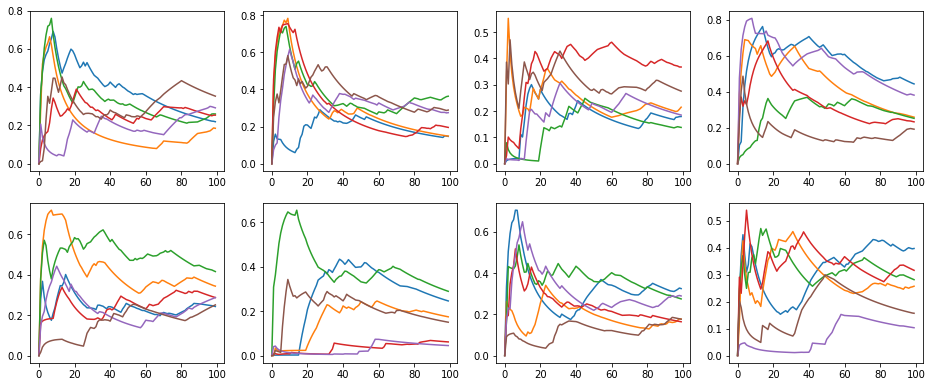

In [140]:
fig=plt.figure(figsize=(16,10))

for d in range(D):
    ax=fig.add_subplot(3,4,d+1)
    for kd in range(K*(d),K*(d+1)):
        ax.plot(range(N_iter),theta_evol_mean[:,kd])
plt.show()

In [160]:
#we compute the U matrix N*N showing the number of shared clusters between each data point
import numpy as np
print(np.around(U_hat,0))
U=np.dot(Z,Z.T)
print(U)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

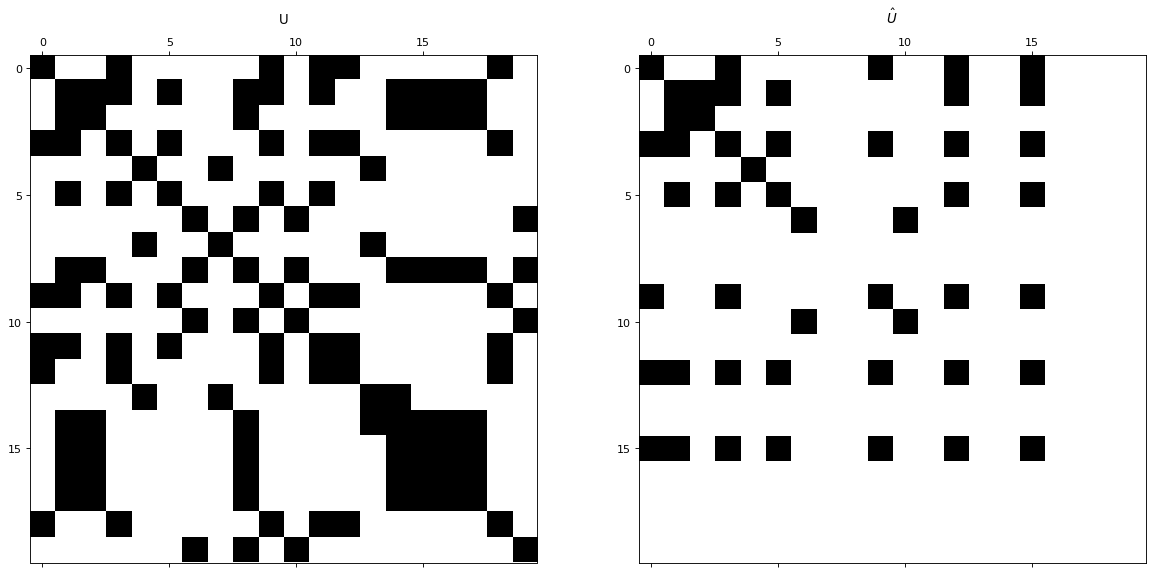

In [161]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text('U')
ax2.title.set_text('$\hat{U}$')

ax1.spy(U)
ax2.spy(U_hat)

plt.show()

In [162]:
# summmary statistics
U_diff=abs(U-U_hat)
print("% of pairs having same number of clusters:",len(U_diff[U_diff<1])/(N*N))
print("% of pairs having at most 1 cluster difference:",len(U_diff[U_diff<2])/(N*N))
print("% of pairs having at most 2 clusters difference:",len(U_diff[U_diff<3])/(N*N))
print("% of pairs having at most 3 clusters difference:",len(U_diff[U_diff<4])/(N*N))

% of pairs having same number of clusters: 0.76
% of pairs having at most 1 cluster difference: 0.98
% of pairs having at most 2 clusters difference: 1.0
% of pairs having at most 3 clusters difference: 1.0
